# Stage 4: Analyze and Visualize Pagination Metrics

This notebook loads all metrics.json files from the output folders, aggregates the results, and plots key metrics (accuracy, latency, error rate, etc.) per pagination method and model.

In [60]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [61]:
# Import Required Libraries
import os
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Locate all metrics.json files in the latest processing/2_fetched_pages/ folder
fetched_root = 'processing/2_fetched_pages/'
folders = [f for f in os.listdir(fetched_root) if os.path.isdir(os.path.join(fetched_root, f))]
latest_folder = sorted(folders)[-1] if folders else None
assert latest_folder, 'No fetched pages folder found.'
metrics_files = glob.glob(os.path.join(fetched_root, latest_folder, '*_metrics.json'))
print(f'Using folder: {latest_folder}, found {len(metrics_files)} metrics files.')

Using folder: 20250831_111058, found 26 metrics files.


In [63]:
# Aggregate metrics from all files into a DataFrame
records = []
for fpath in metrics_files:
    with open(fpath, 'r') as f:
        obj = json.load(f)
    meta = obj.get('meta', {})
    print(f"Processing file: {fpath}")
    for key, res in obj.get('results', {}).items():
        if not res.get('criteria'):
            continue
        method, model = key.split('_', 1) if '_' in key else (key, None)
        rec = {
            'table_id': meta.get('id'),
            'table_name': meta.get('name'),
            'method': method,
            'model': model,
            'row_count': res.get('row_count'),
            'column_consistency': res.get('column_consistency'),
            'error_rate': res.get('error_rate'),
            'avg_latency': res.get('avg_latency'),
            'sum_tokens': res.get('sum_tokens'),
            'accuracy_recall': res.get('accuracy', {}).get('row_recall'),
            'accuracy_precision': res.get('accuracy', {}).get('row_precision'),
            'accuracy_f1': res.get('accuracy', {}).get('row_f1')
        }
        records.append(rec)
df_metrics = pd.DataFrame(records)
print(f'Aggregated metrics for {len(df_metrics)} table-method-model combinations.')

Processing file: processing/2_fetched_pages/20250831_111058/11_playstation_3_cooperative_games_metrics.json
Processing file: processing/2_fetched_pages/20250831_111058/59_miss_new_york_usa_delegates_2012_metrics.json
Processing file: processing/2_fetched_pages/20250831_111058/9_tour_de_france_2009_metrics.json
Processing file: processing/2_fetched_pages/20250831_111058/34_ramsar_convention_parties_metrics.json
Processing file: processing/2_fetched_pages/20250831_111058/19_living_proof_the_farewell_tour_metrics.json
Processing file: processing/2_fetched_pages/20250831_111058/25_english_latin_rivalry_1887_2012_metrics.json
Processing file: processing/2_fetched_pages/20250831_111058/2_belgium_demographics_1900_2011_metrics.json
Processing file: processing/2_fetched_pages/20250831_111058/3_australia_demographics_1900_2010_metrics.json
Processing file: processing/2_fetched_pages/20250831_111058/15_elements_metrics.json
Processing file: processing/2_fetched_pages/20250831_111058/14_minor_pla

## Plot Metrics by Pagination Method and Model

In [64]:
# Set up plotting style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

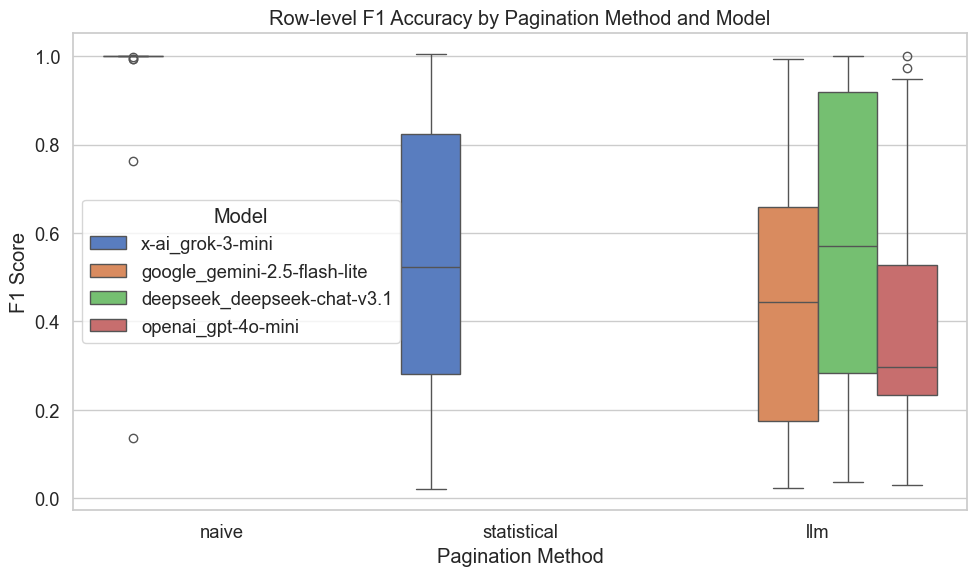

In [65]:
# Plot Accuracy (F1) by Method and Model
plt.figure(figsize=(10,6))
sns.boxplot(data=df_metrics, x='method', y='accuracy_f1', hue='model')
plt.title('Row-level F1 Accuracy by Pagination Method and Model')
plt.ylabel('F1 Score')
plt.xlabel('Pagination Method')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

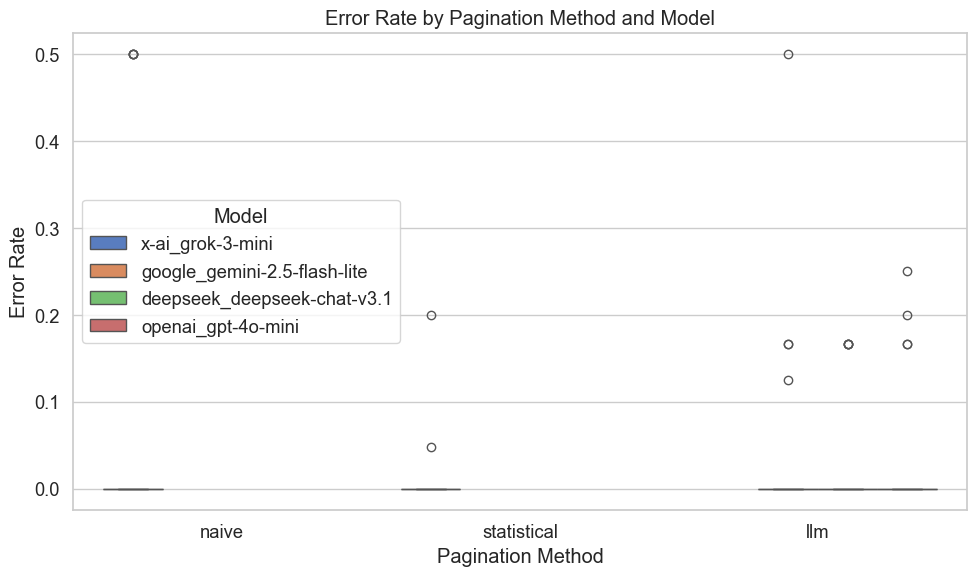

In [66]:
# Plot Error Rate by Method and Model
# Not interesting as no errors encountered, discarded
plt.figure(figsize=(10,6))
sns.boxplot(data=df_metrics, x='method', y='error_rate', hue='model')
plt.title('Error Rate by Pagination Method and Model')
plt.ylabel('Error Rate')
plt.xlabel('Pagination Method')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

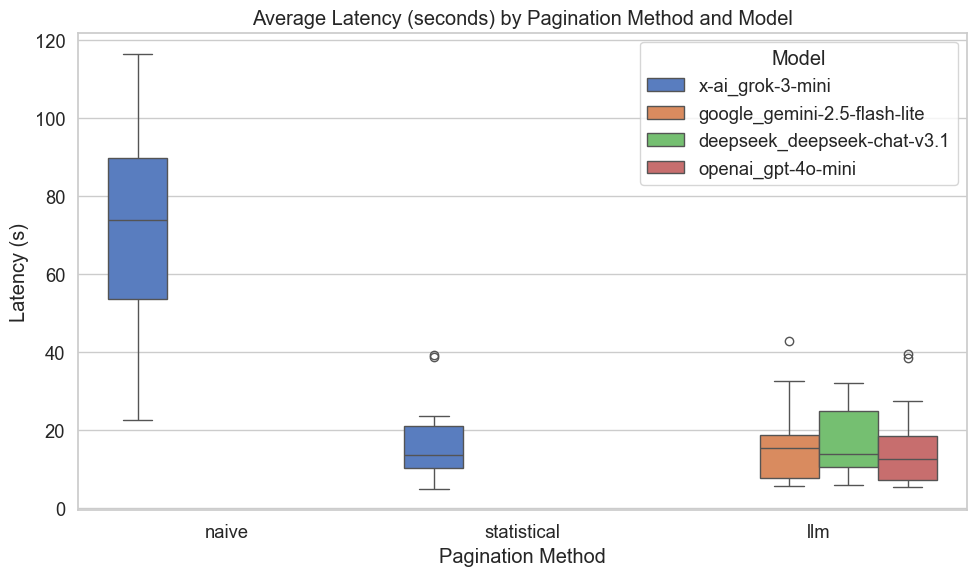

In [67]:
# Plot Average Latency by Method and Model
plt.figure(figsize=(10,6))
sns.boxplot(data=df_metrics, x='method', y='avg_latency', hue='model')
plt.title('Average Latency (seconds) by Pagination Method and Model')
plt.ylabel('Latency (s)')
plt.xlabel('Pagination Method')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

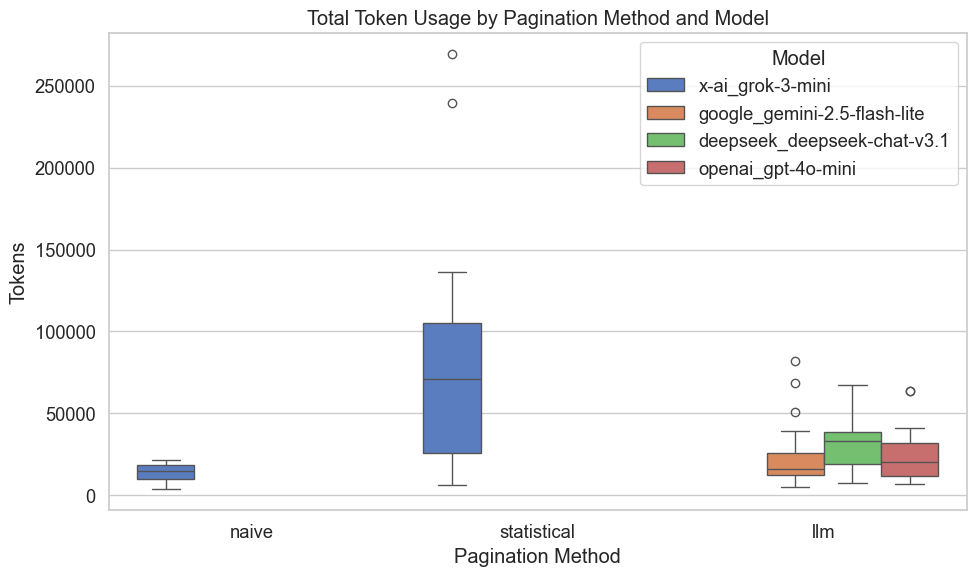

In [68]:
# Plot Total Token Usage by Method and Model
plt.figure(figsize=(10,6))
sns.boxplot(data=df_metrics, x='method', y='sum_tokens', hue='model')
plt.title('Total Token Usage by Pagination Method and Model')
plt.ylabel('Tokens')
plt.xlabel('Pagination Method')
plt.legend(title='Model')
plt.tight_layout()
plt.show()